In [12]:
import os
import pandas as pd
import json

import model_funcs
import torch
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cpu")
torch.set_default_dtype(torch.float64)

MODELS_DIR = '/scratch/ci411/sonos_rirs/models/'
FEATURES_DIR = '/scratch/ci411/sonos_rirs/features/'

In [14]:
print("Loading feature dataframes...")
feat_5k_df = pd.read_csv(os.path.join(FEATURES_DIR, '072722_5k', 'feature_df.csv'))
feat_5k_p_df = pd.read_csv(os.path.join(FEATURES_DIR, '080122_5k_phase', 'feature_df.csv'))
feat_5k_mpc_df = pd.read_csv(os.path.join(FEATURES_DIR, '080222_5k_magphasecont', 'feature_df.csv'))

print("Building test dataloaders...")
dataloader_5k = model_funcs.create_dataloader(feat_5k_df[feat_5k_df['split']=='test'])
dataloader_5k_p = model_funcs.create_dataloader(feat_5k_p_df[feat_5k_p_df['split']=='test'])
dataloader_5k_mpc = model_funcs.create_dataloader(feat_5k_mpc_df[feat_5k_mpc_df['split']=='test'])

Loading feature dataframes...
Building test dataloaders...


name: testrun3_gpu 
notes: medium dataset + GPU loading 
data_path: /scratch/ci411/sonos_rirs/features/072722_5k/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/testrun3_gpu 
1000 epochs completed
Computing Test metrics

Test metrics:
mse: 0.026637350261633903 
bias: 0.1632095287096732 
pearson_cor: 1.0000000000000002 
mean_mult: 1.4561614474158544 


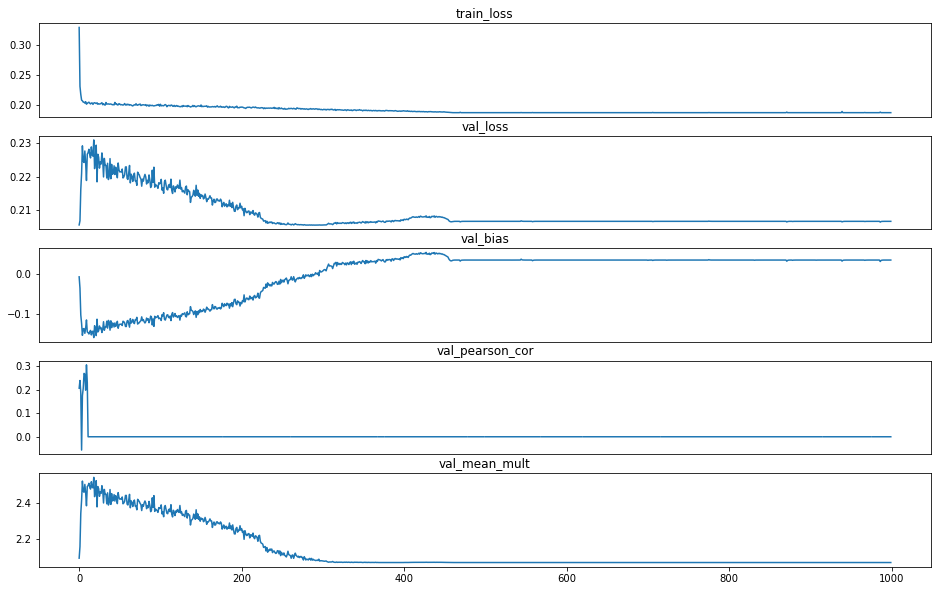

In [16]:
model_name = "testrun3_gpu"
dataloader = dataloader_5k
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(5,1, figsize=(16,10))


cutoff = 0
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    if i<4:
        ax[i].set_xticks([])
print("Computing Test metrics")
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=True)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

name: testrun4_nonlog 
notes: medium dataset + GPU loading + non-log volumes 
data_path: /scratch/ci411/sonos_rirs/features/072722_5k/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/testrun4_nonlog 
1000 epochs completed
Computing Test metrics

Test metrics:
mse: 74661.31758523583 
bias: 267.4767297220248 
pearson_cor: -0.0040474044848534075 
mean_mult: 133.81914309483616 


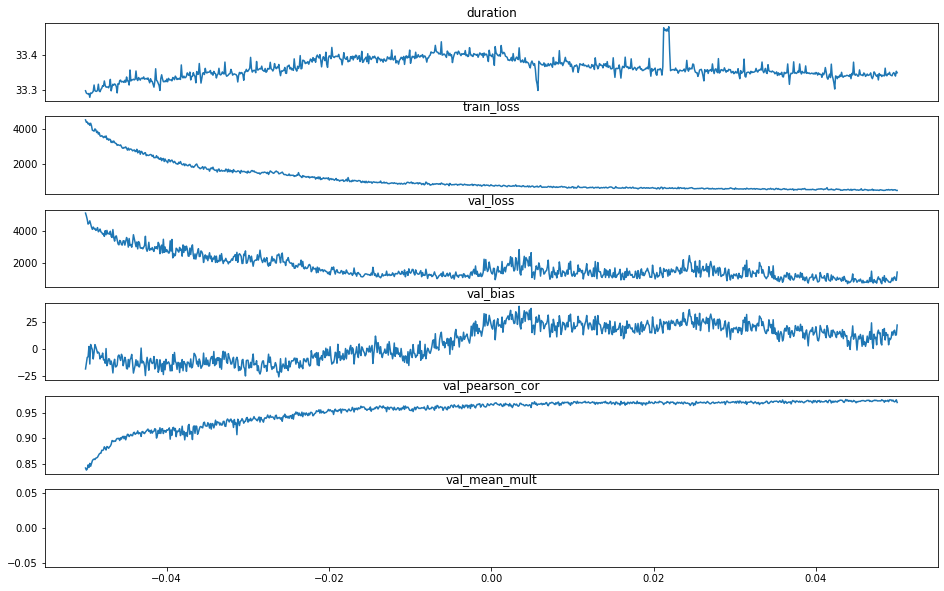

In [18]:
model_name = "testrun4_nonlog"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
dataloader = dataloader_5k

with open(hist_dir) as f:
    hist = json.load(f)

json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')
with open(json_spec) as f:
    spec = json.load(f)    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 50
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    if i<5:
        ax[i].set_xticks([])
      
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=False)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

name: testrun5_phase 
notes: medium phase dataset + GPU loading + non-log volumes 
data_path: /scratch/ci411/sonos_rirs/features/080122_5k_phase/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/testrun5_phase 
1000 epochs completed
Computing Test metrics

Test metrics:
mse: 42056.654636128565 
bias: 193.72345774377612 
pearson_cor: -0.020923955195143916 
mean_mult: 93.58534845961468 


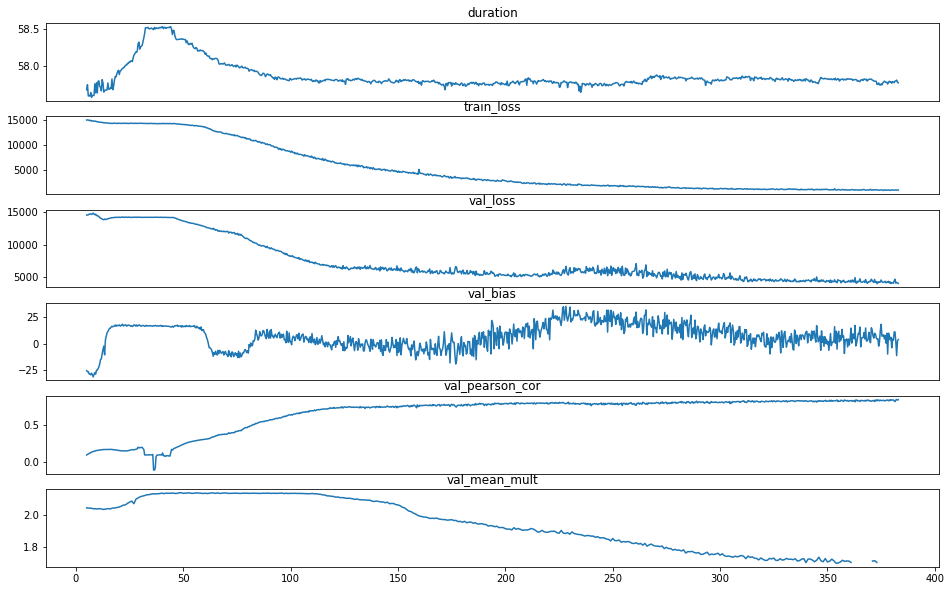

In [20]:
model_name = "testrun5_phase"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
dataloader = dataloader_5k_p

with open(hist_dir) as f:
    hist = json.load(f)

json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')
with open(json_spec) as f:
    spec = json.load(f)    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 5
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    if i<5:
        ax[i].set_xticks([])
        
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=False)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

name: testrun6_mpc 
notes: medium mag/phase/cont dataset + GPU loading + non-log volumes 
data_path: /scratch/ci411/sonos_rirs/features/080222_5k_magphasecont/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/testrun6_mpc 
1000 epochs completed

Test metrics:
mse: 34710.68560655751 
bias: 181.1793143738557 
pearson_cor: 0.02234810215895613 
mean_mult: 90.5028142643568 


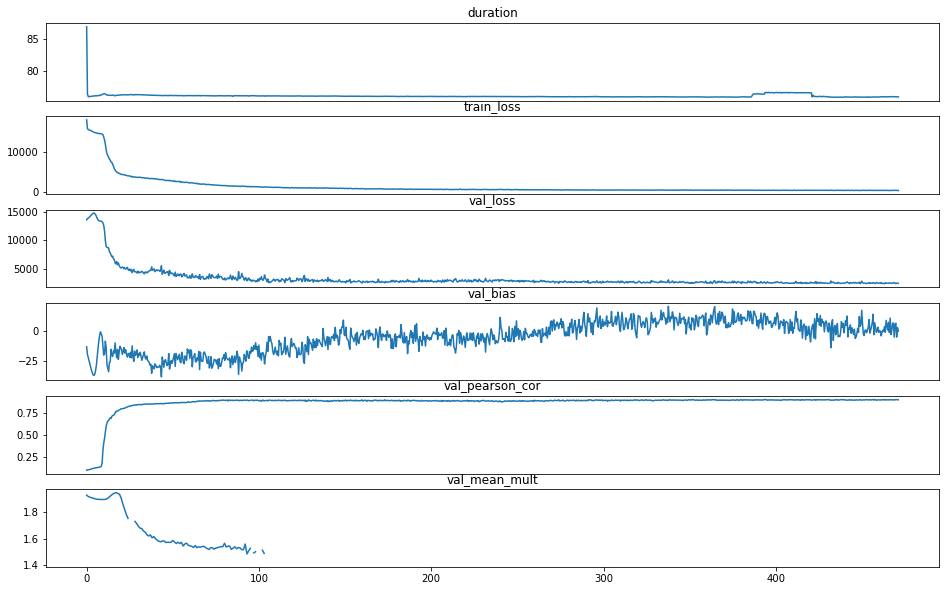

In [37]:
model_name = "testrun6_mpc"
dataloader = dataloader_5k_mpc
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')

with open(hist_dir) as f:
    hist = json.load(f)

json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')
with open(json_spec) as f:
    spec = json.load(f)    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 0
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    if i<5:
        ax[i].set_xticks([])
        
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))
        
test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=False)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

name: testrun7_phase 
notes: medium phase dataset + GPU loading + log volumes 
data_path: /scratch/ci411/sonos_rirs/features/080122_5k_phase/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/testrun7_phase 
750 epochs completed

Test metrics:
mse: 0.026328198223797544 
bias: 0.16225966295970554 
pearson_cor: -1.0 
mean_mult: 1.082467957539479 


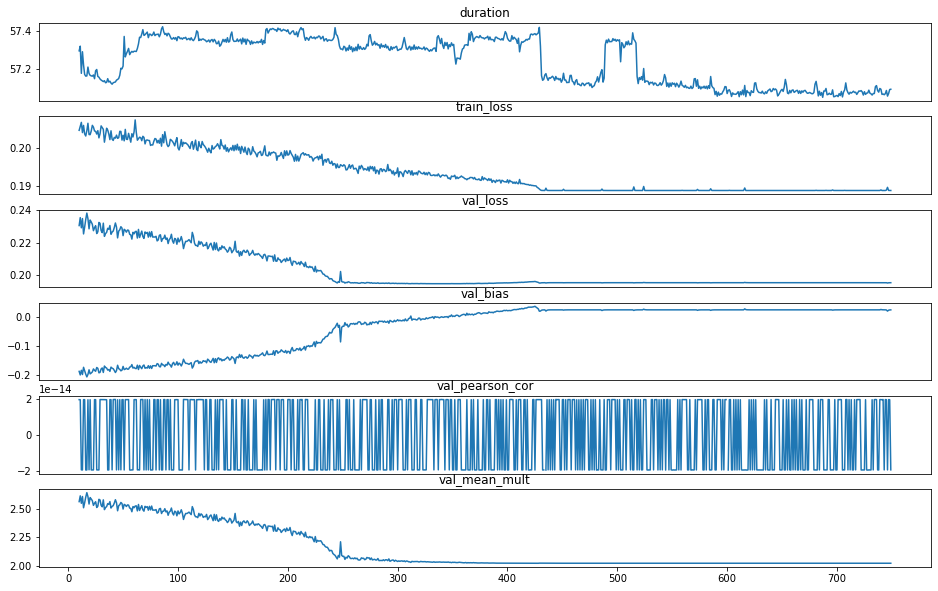

In [38]:
model_name = "testrun7_phase"
dataloader = dataloader_5k_p
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')

with open(hist_dir) as f:
    hist = json.load(f)

json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')
with open(json_spec) as f:
    spec = json.load(f)    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 10
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    if i<5:
        ax[i].set_xticks([])
        
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))
        
test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=False)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

name: testrun8_mpc 
notes: medium mag/phase/cont dataset + GPU loading + log volumes 
data_path: /scratch/ci411/sonos_rirs/features/080222_5k_magphasecont/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/testrun8_mpc 
564 epochs completed
Computing Test metrics

Test metrics:
mse: 0.025116028355935807 
bias: 0.15848037214726637 
pearson_cor: -1.0 
mean_mult: 1.0805471450062558 


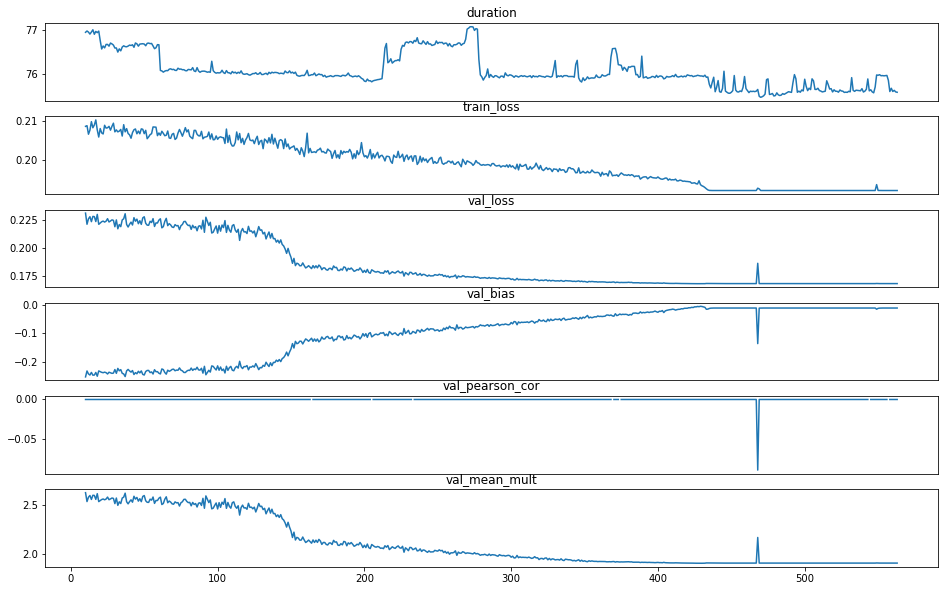

In [39]:
model_name = "testrun8_mpc"
dataloader = dataloader_5k_mpc
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')

with open(hist_dir) as f:
    hist = json.load(f)

json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')
with open(json_spec) as f:
    spec = json.load(f)    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 10
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    if i<5:
        ax[i].set_xticks([])
        
print("Computing Test metrics")
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))
        
test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=False)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))